<a id="top"></a>
# BMI203 2025 Gaussian Mixture Model Tutorial
January 28th 2025

***

## Table of Contents
- [Introduction](#introduction-gaussian-mixture-models-gmms)
  - [Key features of this algorithm](#key-features)
  - [Required packages for this tutorial](#required-packages)

- [K-means vs Gaussian Mixture Models](#k-means-vs-gaussian-mixture-models-clustering)
- [How to choose the number of clusters?](#how-to-choose-the-number-of-clusters)
- [Example Use Cases](#example-use-cases)


## Learning Goals

By the end of this tutorial, you will be able to:

- **Explain** when Gaussian Mixture Models (GMMs) should be used instead of K-means.  
-  **Describe** approaches for determining the optimal number of mixtures (clusters) in Gaussian Mixture Models.  
- **Name** some common use cases for Gaussian Mixture Models.


## Introduction: Gaussian Mixture Models (GMMs)


Gaussian Mixture Models (GMMs) are a type of clustering algorithm commonly used in research and bioinformatics. This algorithm models data points as coming from a "mixture" of multiple Gaussian distributions.

### Key Features:
- **Soft Clustering**: Instead of assigning each sample to a single cluster, GMMs assign probabilities for a sample to belong to each cluster.  
- **Unsupervised**: The true cluster labels of samples are not known during training.  
- **Generative**: GMMs can be used to generate synthetic data based on the learned distribution.  
- **Predefined Number of Clusters**: The number of clusters must be specified beforehand, which can be challenging if it is unknown.  
- **Advantages over K-Means**: GMMs are preferred over K-means when soft clustering is required (e.g., overlapping clusters) or when data generation is needed.  
- **Computational Demand**: GMMs can be computationally intensive, particularly for large datasets or high-dimensional data.


### Resources with good overviews: 
- [Understanding Gaussian Mixture Models: A Comprehensive Guide](https://medium.com/@juanc.olamendy/understanding-gaussian-mixture-models-a-comprehensive-guide-df30af59ced7)
- [Build Better and Accurate Clusters with Gaussian Mixture Models](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)
  - Also briefly introduces clustering and k-means clustering, to explain the importance / value of GMM

***

### Required Packages
- *numpy* to handle array functions
- *matplotlib.pyplot* for plotting data
- *sklearn* for generating toy data, and running clustering algorithms  
  -  pip package is scikit-learn

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import sklearn

## K-means vs Gaussian Mixture Models clustering

### Generating example data

Below we are going to use the sklearn package to create two datasets. 

In [9]:
# set seed for reproducibility
random_state=28

from sklearn.datasets import make_blobs

# generate 2d dataset
Xa, Ya= make_blobs(n_samples=100,  
                                         centers=[[1,1], [5, 5], [8, 8]], # mid point of each cluster
                                         cluster_std = [2,2.5,3], # standard devivation of each cluster
                                         random_state=random_state)

Xb, Yb = make_blobs(n_samples=100,  
                                         centers=[[1, 1], [5, 5], [8, 8]],
                                         cluster_std = [0.5,0.5,0.5],
                                         random_state=random_state)


### Question

Before visualising the above datasets, can you tell what the differences between the two datasets is? 

**Answer:** 

### Visualizing the example data

C:\Users\ijfbe\AppData\Local\Temp\ipykernel_26880\853309964.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


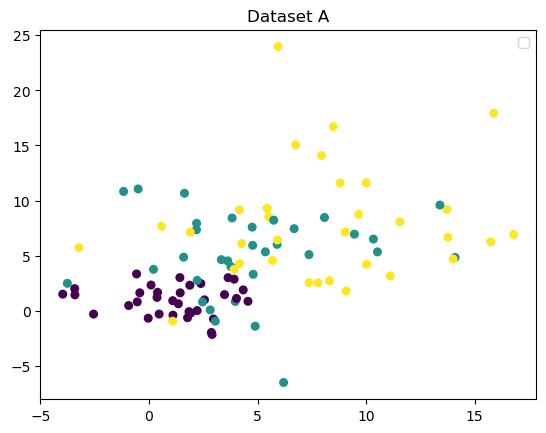

In [7]:
# Flip axes for Xa to change orientation
Xa = Xa[:, ::-1]

# Scatter plot for both datasets
plt.scatter(Xa[:, 0], Xa[:, 1], c=Ya, s=30, cmap='viridis')  # Dataset A
plt.title("Dataset A")
plt.legend()
plt.show()

C:\Users\ijfbe\AppData\Local\Temp\ipykernel_26880\2636007092.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


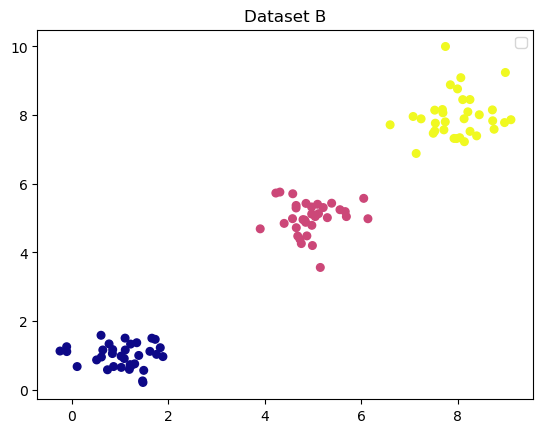

In [8]:
Xb = Xb[:, ::-1]

# Scatter plot for both datasets
plt.scatter(Xb[:, 0], Xb[:, 1], c=Yb, s=30, cmap='plasma')  # Dataset B
plt.title("Dataset B")
plt.legend()
plt.show()

## Question: 

Now, having visualized both datasets, what is the difference in the cluster make up of each of these datasets? 

**Answer:** 


## Question: 

Which dataset is more reflective of clusters in biological datasets? Can you think of example of biological data that might look like the second dataset? 

**Answer:** 

### Comparing K-means to Gaussian Mixture Models algorithms on the first dataset 

c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


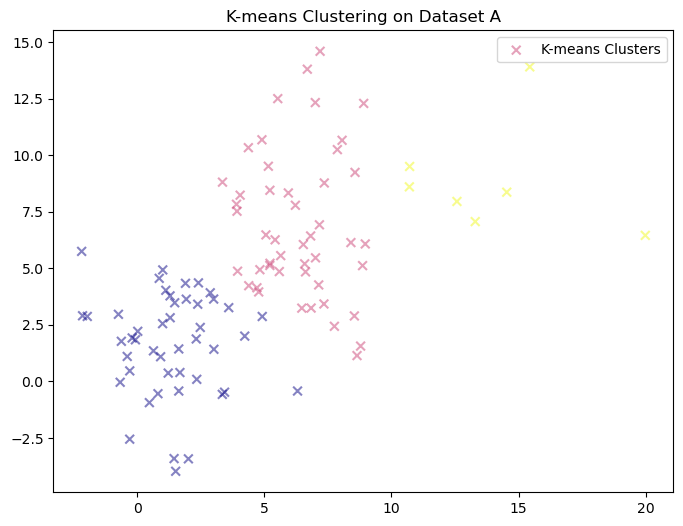

In [11]:
# Apply K-means clustering with 3 clusters (since we know there are 3 centers)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(Xa)

# Get the cluster labels predicted by K-means
y_kmeans = kmeans.predict(Xa)

# Scatter plot the data with true labels and predicted labels
plt.figure(figsize=(8, 6))

# True labels scatter plot
#plt.scatter(Xa[:, 0], Xa[:, 1], c=Ya, s=40, cmap='viridis', marker='o', label="True Labels")

# K-means predicted labels scatter plot
plt.scatter(Xa[:, 0], Xa[:, 1], c=y_kmeans, s=40, cmap='plasma', marker='x', alpha=0.5, label="K-means Clusters")

plt.legend()
plt.title('K-means Clustering on Dataset A')
plt.show()

c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


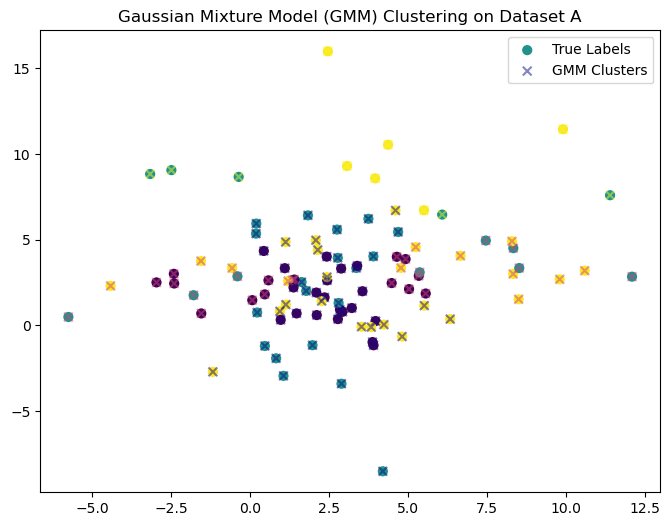

In [5]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model with 3 components (since we know there are 3 clusters)
gmm = GaussianMixture(n_components=3, random_state=random_state)
gmm.fit(Xa)

# Get the cluster labels predicted by GMM
y_gmm = gmm.predict(Xa)

# Scatter plot the data with true labels and predicted labels
plt.figure(figsize=(8, 6))

# True labels scatter plot
#plt.scatter(Xa[:, 0], Xa[:, 1], c=Ya, s=40, cmap='viridis', marker='o', label="True Labels")

# GMM predicted labels scatter plot
plt.scatter(Xa[:, 0], Xa[:, 1], c=y_gmm, s=40, cmap='plasma', marker='x', alpha=0.5, label="GMM Clusters")

plt.legend()
plt.title('Gaussian Mixture Model (GMM) Clustering on Dataset A')
plt.show()

### Question: 

Compare the clustering performance of the two algorithms above. Which algorithm more accurately assigned points to clusters? 

*Answer:*

### Investigating poorly assigned points 

## How to choose the number of clusters?
There's no single ubiquitous approach to choosing the number of mixtures when implementing the GMM algorithm. 

Here's some common approaches:

Good guessing before implementing the algorithm:  
- Prior Domain Knowledge
  - Do you know how many clusters there should be, or you want there to be? 
- Visualization 
  - When you plot the data (often using dimension reduction techniques), do you notice a particular number of clusters? 

Comparing the results after implementing the algorithm inputting different number of mixtures: 
- Bayesian Information Criterion (BIC) 
  - [Example of sklearn implementation](https://scikit-learn.org/dev/auto_examples/mixture/plot_gmm_selection.html)
- Silhouette coefficients
   - [Example using sklearn with K-means](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)


### Visualization 

### Question: 

Assume we don't know how many clusters were in the first dataset. How many clusters would you think are in this dataset? Use the below plot. 

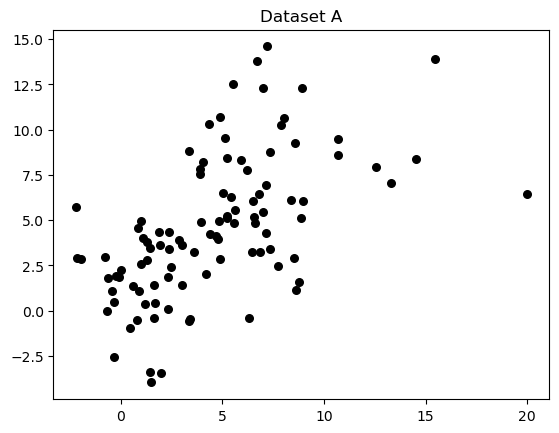

In [ ]:
# Scatter plot with all points in black
plt.scatter(Xa[:, 0], Xa[:, 1], c='k', s=30)

plt.title("Dataset A")

plt.show()

### Question: 
Repeat the same analysis for the second dataset. 

Assume we don't know how many clusters were in this dataset. How many clusters would you think are in this dataset? Use the below plot. 

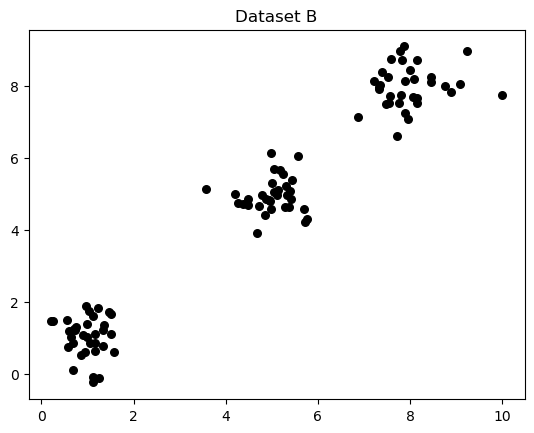

In [15]:
# Scatter plot with all points in black
plt.scatter(Xb[:, 0], Xb[:, 1], c='k', s=30)

plt.title("Dataset B")

plt.show()

### Using BIC

c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ijfbe\anaconda3\envs\GMM-Tute\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

NameError: name 'Xmoon' is not defined

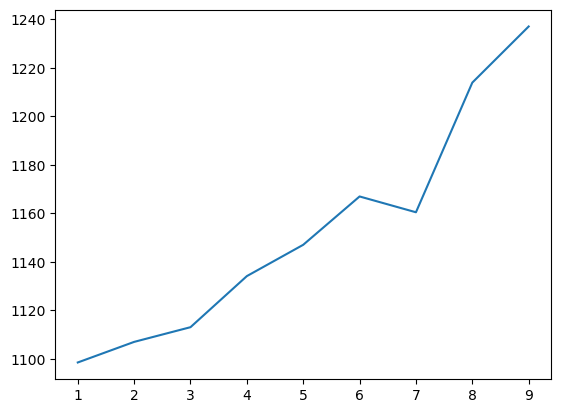

In [20]:
from sklearn.mixture import GaussianMixture

# number of mixture components to try
n_components = np.arange(1, 10)

# Fit GMM models for each number of components
models = [GaussianMixture(n_components=n, random_state=random_state).fit(Xa)
          for n in n_components]

# Scikit-Learn's GMM estimator actually includes built-in methods that compute both the BIC and the AIC,
# Plot BIC (Bayesian Information Criterion)
plt.plot(n_components, [m.bic(Xa) for m in models], label='BIC')

#plt.legend(loc='best')
#plt.xlabel('n_components');

plt.show()

## Example Use Cases

In [68]:
## outline some useful cases for implementation of the algorithm

***

[Back to Top of the page](#top)


[Back to Table of Contents](#table-of-contents)


<img style="float: right;" src="https://identity.ucsf.edu/sites/g/files/tkssra266/f/wysiwyg/logo_signature_0.jpg" alt="UCSF Logo" width="200px"/>
